<a href="https://colab.research.google.com/github/Edenshmuel/Final-Project/blob/main/Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files

In [2]:
uploaded = files.upload()

Saving Data2024.csv to Data2024.csv


In [3]:
df_2024 = pd.read_csv(list(uploaded.keys())[0])

<ipython-input-3-6be93c37e61b>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2024 = pd.read_csv(list(uploaded.keys())[0])


In [4]:
df_2024

,Month,תאריך,סוג פריט,תאור סוג,מס' פריט,תאור פריט,הזמנה,כמות,סכום,הנחה לפריט,אחרי הנחה
0,"January, 2024",01/01/2024,1,פיצות מיוחדות 14',4,ביאנקה 14' [],7636270,1,0.0,0,0.0
1,"January, 2024",01/01/2024,1,פיצות מיוחדות 14',4,ביאנקה 14' [],7636327,1,85.9,0,85.9
2,"January, 2024",01/01/2024,1,פיצות מיוחדות 14',5,טוליפ 14' [],7636270,1,0.0,0,0.0
3,"January, 2024",01/01/2024,1,פיצות מיוחדות 14',92,פפרוני ספיישל בצק דק 14' [],7636281,1,0.0,0,0.0
4,"January, 2024",01/01/2024,1,פיצות מיוחדות 14',93,קריביאן בצק דק 14' [],7636289,1,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
134737,"December, 2024",10/12/2024,13,פיצות מיוחדות 14',275,קלאסית 8' [],7667424,1,0.0,0,0.0
134738,"December, 2024",10/12/2024,13,פיצות מיוחדות 14',275,קלאסית 8' [],7667428,1,0.0,0,0.0
134739,"December, 2024",10/12/2024,13,פיצות מיוחדות 14',277,קלאסית דקה 14' [],7667430,1,74.9,0,74.9
134740,"December, 2024",10/12/2024,18,פריטים מבצעים,2628,הטבה במחיר מיוחד,7667430,1,0.0,0,0.0


In [5]:
# הצגת סוג הנתונים וכמות הערכים החסרים בכל עמודה
missing_data = df_2024.isnull().sum()  # ספירת ערכים חסרים
data_types = df_2024.dtypes  # סוגי הנתונים

# איחוד המידע למסגרת נתונים אחת לנוחות התצוגה
data_summary = pd.DataFrame({
    'Data Type': data_types,
    'Missing Values': missing_data,
    'Percentage Missing': (missing_data / len(df_2024)) * 100
})

# הצגת המידע
data_summary

,Data Type,Missing Values,Percentage Missing
Month,object,0,0.000000
תאריך,object,0,0.000000
סוג פריט,object,0,0.000000
תאור סוג,object,10804,8.018287
מס' פריט,object,0,0.000000
תאור פריט,object,557,0.413383
הזמנה,int64,0,0.000000
כמות,int64,0,0.000000
סכום,float64,0,0.000000
הנחה לפריט,int64,0,0.000000


In [6]:
# Converting the date column to datetime format and extracting useful features
df_2024['תאריך'] = pd.to_datetime(df_2024['תאריך'], dayfirst=True)  # Ensure date format is correct
df_2024['Day_of_Week'] = df_2024['תאריך'].dt.day_name()  # Extract day of the week
df_2024['Month_Name'] = df_2024['תאריך'].dt.month_name()  # Extract month name
df_2024['Week_of_Year'] = df_2024['תאריך'].dt.isocalendar().week  # Week of the year

In [7]:
df_2024

,Month,תאריך,סוג פריט,תאור סוג,מס' פריט,תאור פריט,הזמנה,כמות,סכום,הנחה לפריט,אחרי הנחה,Day_of_Week,Month_Name,Week_of_Year
0,"January, 2024",2024-01-01,1,פיצות מיוחדות 14',4,ביאנקה 14' [],7636270,1,0.0,0,0.0,Monday,January,1
1,"January, 2024",2024-01-01,1,פיצות מיוחדות 14',4,ביאנקה 14' [],7636327,1,85.9,0,85.9,Monday,January,1
2,"January, 2024",2024-01-01,1,פיצות מיוחדות 14',5,טוליפ 14' [],7636270,1,0.0,0,0.0,Monday,January,1
3,"January, 2024",2024-01-01,1,פיצות מיוחדות 14',92,פפרוני ספיישל בצק דק 14' [],7636281,1,0.0,0,0.0,Monday,January,1
4,"January, 2024",2024-01-01,1,פיצות מיוחדות 14',93,קריביאן בצק דק 14' [],7636289,1,0.0,0,0.0,Monday,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134737,"December, 2024",2024-12-10,13,פיצות מיוחדות 14',275,קלאסית 8' [],7667424,1,0.0,0,0.0,Tuesday,December,50
134738,"December, 2024",2024-12-10,13,פיצות מיוחדות 14',275,קלאסית 8' [],7667428,1,0.0,0,0.0,Tuesday,December,50
134739,"December, 2024",2024-12-10,13,פיצות מיוחדות 14',277,קלאסית דקה 14' [],7667430,1,74.9,0,74.9,Tuesday,December,50
134740,"December, 2024",2024-12-10,18,פריטים מבצעים,2628,הטבה במחיר מיוחד,7667430,1,0.0,0,0.0,Tuesday,December,50


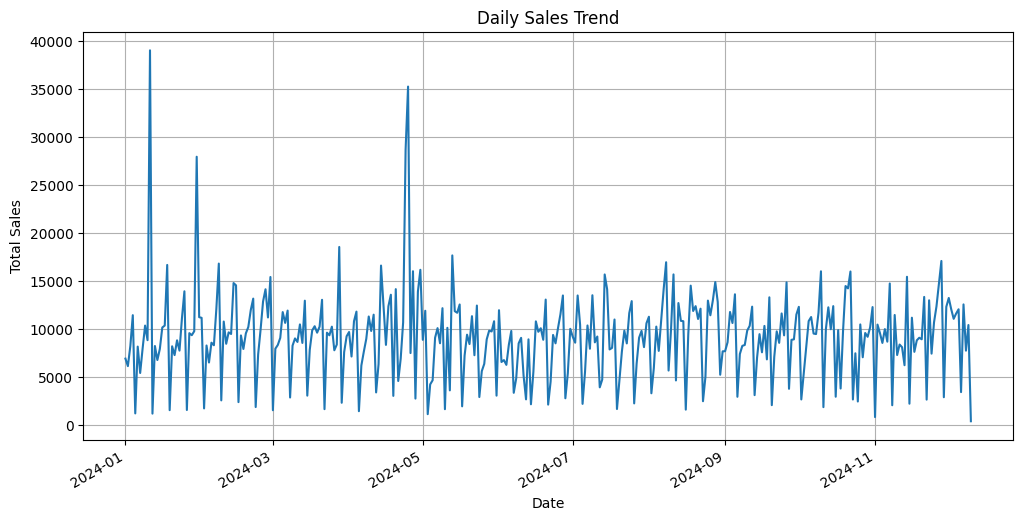

In [8]:
import matplotlib.pyplot as plt

# Grouping data by date and summing the sales
daily_sales = df_2024.groupby('תאריך')['אחרי הנחה'].sum()

# Plotting the trend over time
plt.figure(figsize=(12,6))
daily_sales.plot(kind='line')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

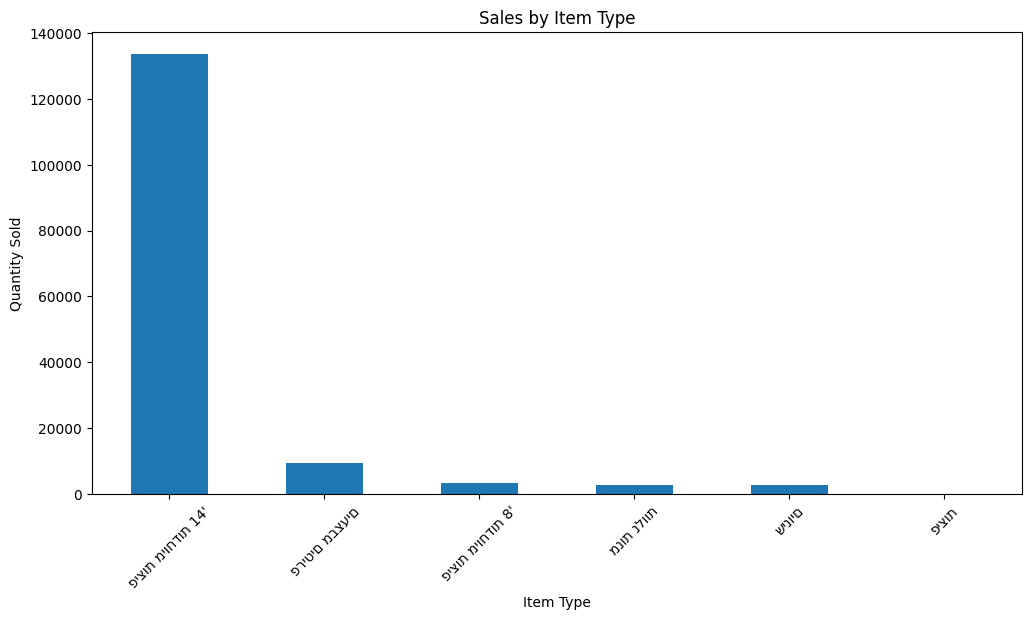

In [9]:
# Grouping by item type and summing quantities sold
item_sales = df_2024.groupby('תאור סוג')['כמות'].sum().sort_values(ascending=False)

# Plotting the top item categories
plt.figure(figsize=(12,6))
item_sales.plot(kind='bar')
plt.title('Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

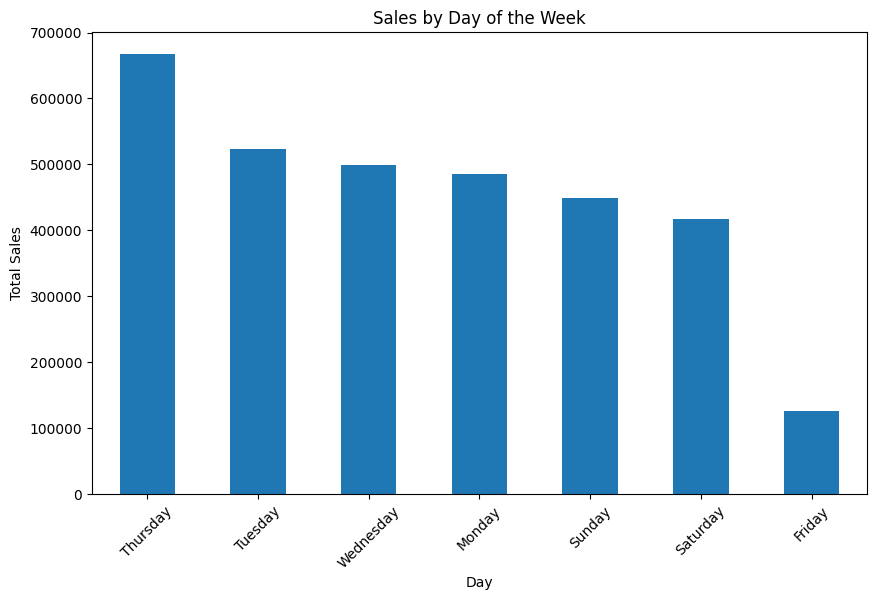

In [10]:
# Grouping by day of the week and summing sales
day_sales = df_2024.groupby('Day_of_Week')['אחרי הנחה'].sum().sort_values(ascending=False)

# Plotting sales by day of the week
plt.figure(figsize=(10,6))
day_sales.plot(kind='bar')
plt.title('Sales by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

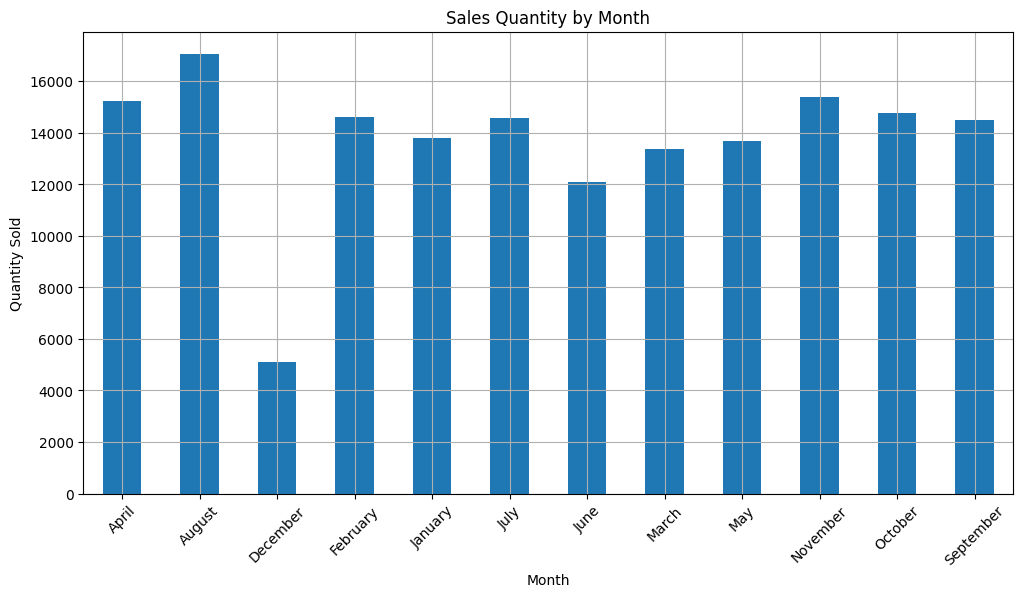

In [14]:
import matplotlib.pyplot as plt

# Grouping by month and summing the quantity sold
monthly_sales = df_grouped.groupby(df_grouped['תאריך'].dt.month_name())['כמות'].sum().sort_index()

# Plotting the sales by month
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='bar')
plt.title('Sales Quantity by Month')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [12]:
# Grouping by 'הזמנה' and aggregating the items ordered in each order
# Combining the item descriptions into a single string for each order
df_grouped = df_2024.groupby('הזמנה').agg({
    'תאריך': 'first',  # Keeping the first date for each order
    'תאור סוג': lambda x: ', '.join(x.dropna().unique()),  # Combining unique item types into a string
    'תאור פריט': lambda x: ', '.join(x.dropna().unique()), # Combining unique item descriptions
    'כמות': 'sum',  # Summing quantities for each order
    'סכום': 'sum',  # Summing the total amount for each order
    'הנחה לפריט': 'sum',  # Summing the total discount
    'אחרי הנחה': 'sum'  # Summing the total amount after discount
}).reset_index()

# Display the grouped data
df_grouped.head()

,הזמנה,תאריך,תאור סוג,תאור פריט,כמות,סכום,הנחה לפריט,אחרי הנחה
0,7636259,2024-01-01,פיצות מיוחדות 14',מרגריטה 8' [],1,30.90,0,30.90
1,7636260,2024-01-01,פיצות מיוחדות 8',"זיתים ירוקים חצי ימין, פאפא קראסט קלאסי 14' []",2,88.85,0,88.85
2,7636261,2024-01-01,"פיצות מיוחדות 14', פריטים מבצעים","תירס, תוספת גבינה, עגבניות, ארוחת ילדים, קלאסי...",8,59.00,0,59.00
3,7636262,2024-01-01,פיצות מיוחדות 14',קלאסית 8' [],1,30.90,0,30.90
4,7636263,2024-01-01,פיצות מיוחדות 14',"פיוז טי אפרסק 1.5 ליטר, קלאסית 16' []",2,97.70,0,97.70


In [22]:
# Converting the date column to datetime format and extracting useful features
df_grouped['תאריך'] = pd.to_datetime(df_grouped['תאריך'], dayfirst=True)  # Ensure date format is correct
df_grouped['Day_of_Week'] = df_grouped['תאריך'].dt.day_name()  # Extract day of the week
df_grouped['Month_Name'] = df_grouped['תאריך'].dt.month_name()  # Extract month name
df_grouped['Week_of_Year'] = df_grouped['תאריך'].dt.isocalendar().week  # Week of the year

In [23]:
df_grouped

,הזמנה,תאריך,תאור סוג,תאור פריט,כמות,סכום,הנחה לפריט,אחרי הנחה,Day_of_Week,Month_Name,Week_of_Year
0,7636259,2024-01-01,פיצות מיוחדות 14',מרגריטה 8' [],1,30.90,0,30.90,Monday,January,1
63,7636323,2024-01-01,"פיצות מיוחדות 14', פריטים מבצעים","ספרון מדבקות לילדים - תרומה, קלאסית 14' [], פי...",3,72.90,0,72.90,Monday,January,1
62,7636322,2024-01-01,"פיצות מיוחדות 14', פריטים מבצעים, פיצות מיוחדו...","אצבעות גבינה, שוקולד קראנץ' רול, פפרוצ'יני, זי...",6,148.60,0,148.60,Monday,January,1
61,7636321,2024-01-01,"פיצות מיוחדות 14', פריטים מבצעים, פיצות מיוחדו...","דיאט קולה 1.5 ליטר, פטריות, זיתי קלמטה, קלאסית...",6,167.20,0,167.20,Monday,January,1
59,7636319,2024-01-01,"פיצות מיוחדות 14', פיצות מיוחדות 8'","צ'יזי רול, רוטב שום פרמזן קטן, פאפא קראסט קלאס...",3,116.80,0,116.80,Monday,January,1
...,...,...,...,...,...,...,...,...,...,...,...
30569,7667424,2024-12-10,פיצות מיוחדות 14',"שקית לקוח, פיצה אישית, קלאסית 8' []",4,29.50,0,29.50,Tuesday,December,50
30570,7667425,2024-12-10,"פיצות מיוחדות 14', פריטים מבצעים","המומלצת של פאפא 8' [], מרגריטה 8' [], עם תבלין...",3,80.40,0,80.40,Tuesday,December,50
30571,7667426,2024-12-10,פיצות מיוחדות 14',"פחית קולה זירו, אנשובי, אננס, ללא משולשים, מרג...",6,62.60,0,62.60,Tuesday,December,50
30572,7667428,2024-12-10,פיצות מיוחדות 14',"שקית לקוח, פיצה אישית, קלאסית 8' []",4,29.50,0,29.50,Tuesday,December,50


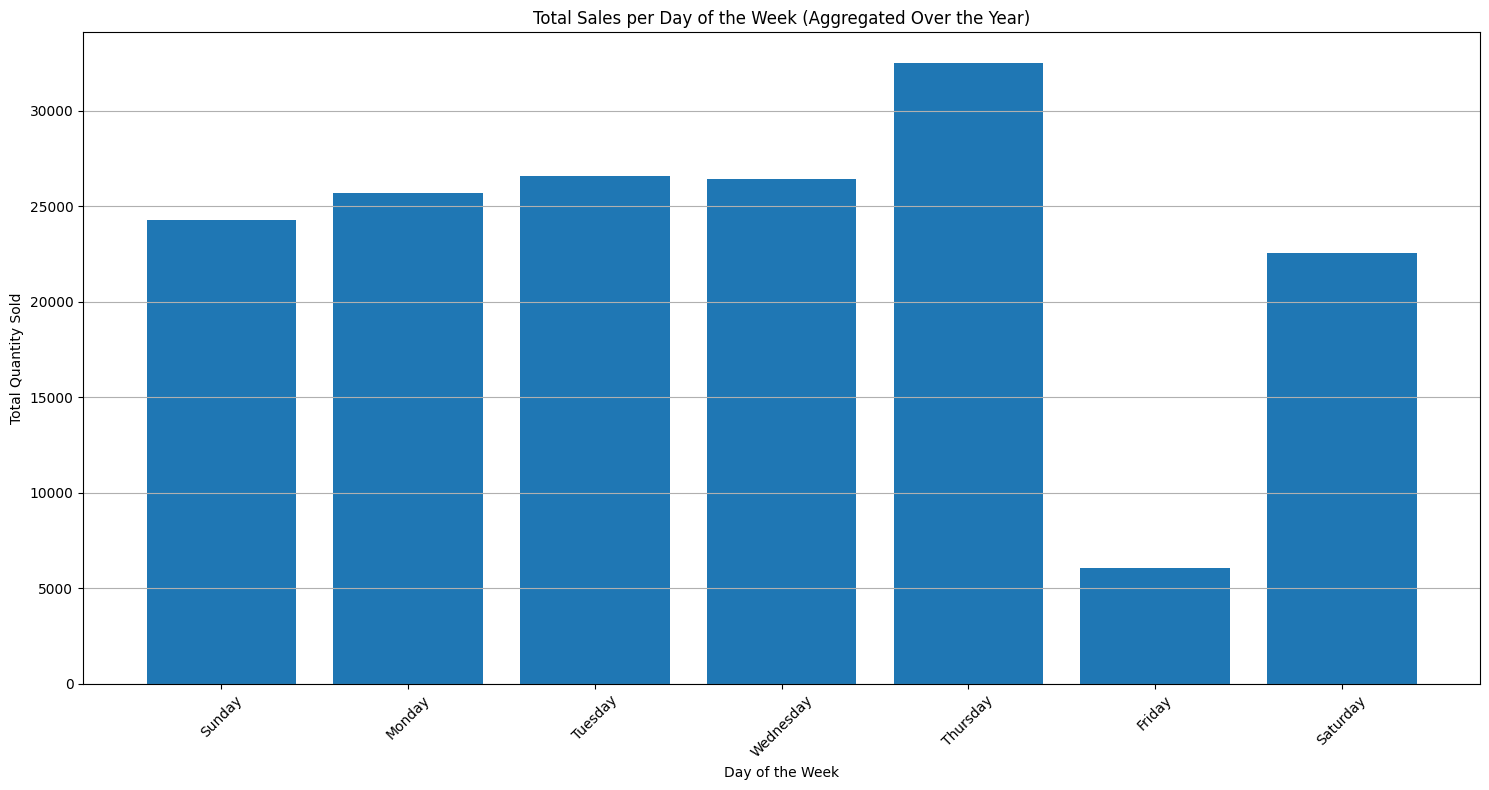

In [17]:
import matplotlib.pyplot as plt

# Ensure the date column is in datetime format and extract the day of the week
df_grouped['Day_of_Week'] = df_grouped['תאריך'].dt.day_name()

# Defining the order of the days of the week for proper sorting
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Grouping sales data by day of the week and summing across the entire year
weekly_aggregate_sales = df_grouped.groupby('Day_of_Week')['כמות'].sum().reindex(day_order)

# Plotting the total sales for each day of the week aggregated over the year
plt.figure(figsize=(15, 8))
plt.bar(weekly_aggregate_sales.index, weekly_aggregate_sales.values)

# Customizing the plot
plt.title('Total Sales per Day of the Week (Aggregated Over the Year)')
plt.xlabel('Day of the Week')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

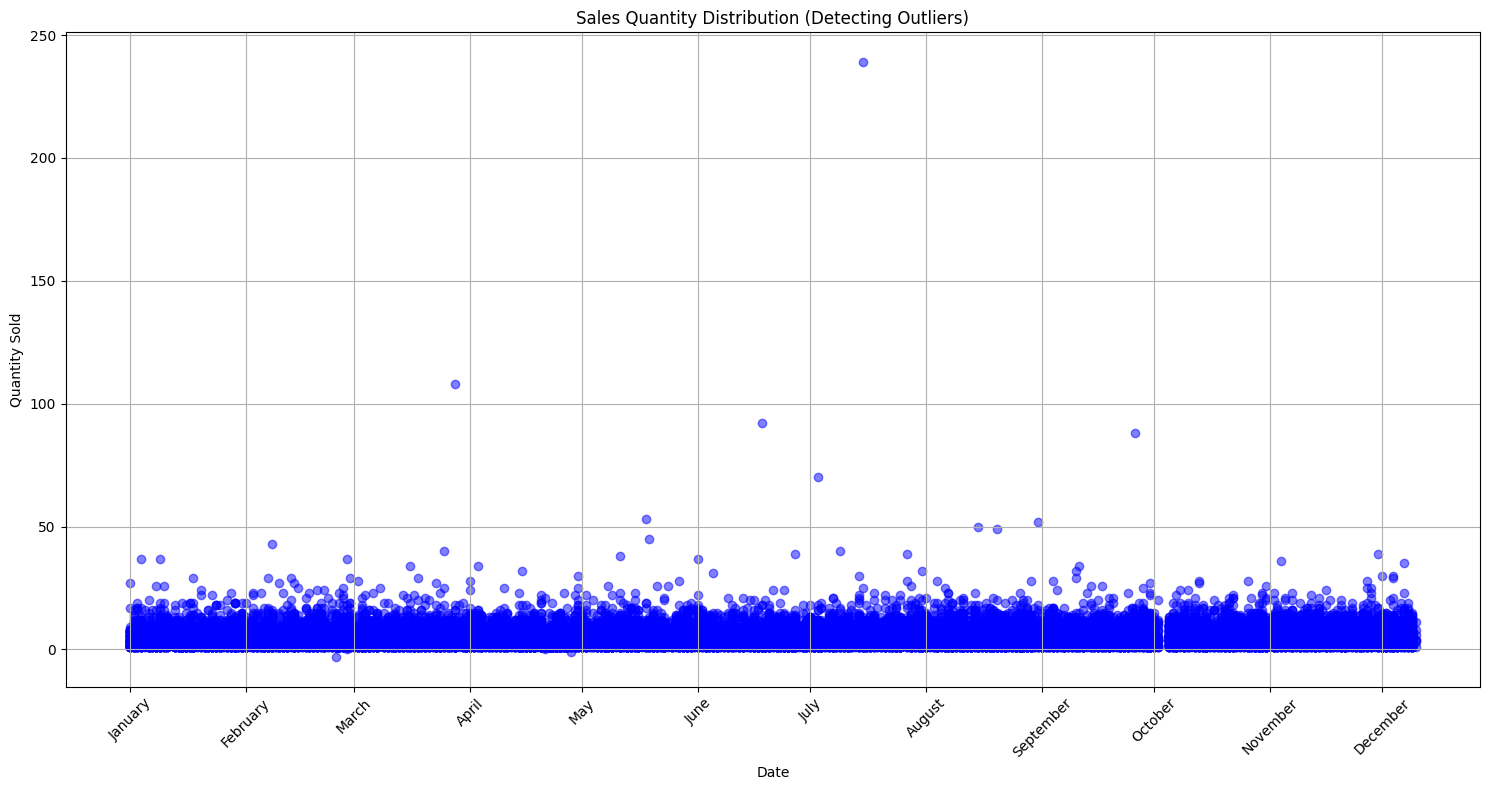

In [18]:
import matplotlib.pyplot as plt

# Sorting data by date to ensure chronological order
df_grouped = df_grouped.sort_values('תאריך')

# Scatter plot to visualize outliers in sales quantity per order
plt.figure(figsize=(15, 8))
plt.scatter(df_grouped['תאריך'], df_grouped['כמות'], alpha=0.5, c='blue')

# Customizing the plot to show all months on X-axis
plt.title('Sales Quantity Distribution (Detecting Outliers)')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')

# Setting the ticks for all months
plt.xticks(df_grouped['תאריך'].dt.to_period("M").drop_duplicates().dt.start_time,
           df_grouped['תאריך'].dt.strftime('%B').unique(), rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


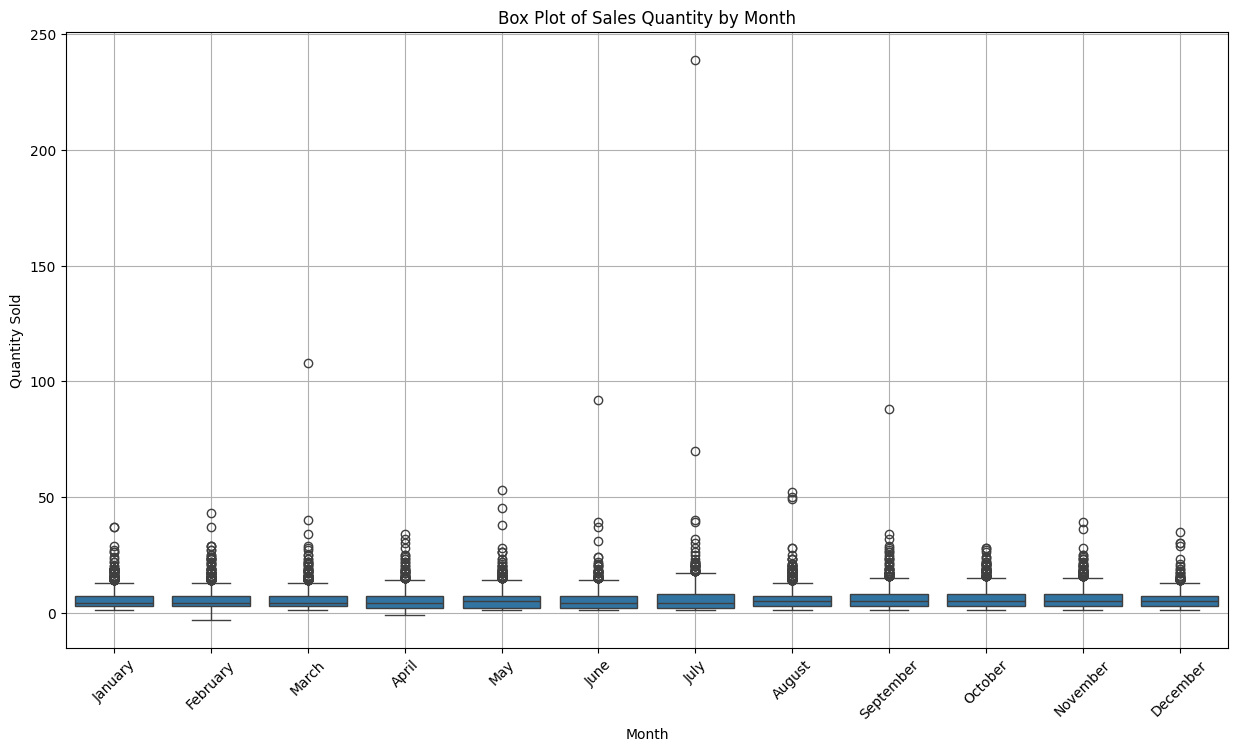

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot for sales quantity per month
plt.figure(figsize=(15, 8))
sns.boxplot(x='Month_Name', y='כמות', data=df_grouped, order=[
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
])

# Customizing the plot
plt.title('Box Plot of Sales Quantity by Month')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Creating a pivot table where rows are months and columns are days of the week
monthly_weekly_sales = df_grouped.pivot_table(
    values='כמות',
    index=df_grouped['תאריך'].dt.month_name(),
    columns=df_grouped['תאריך'].dt.day_name(),
    aggfunc='sum',
    fill_value=0
)

In [80]:
# Defining the correct order for months and days of the week
month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Reindexing to ensure all months and days are included, even if data is missing
monthly_weekly_sales = monthly_weekly_sales.reindex(index=month_order, columns=day_order, fill_value=0)

In [81]:
# Reset the index to move months from the index to a column
monthly_weekly_sales = monthly_weekly_sales.reset_index()

# Rename the new column (if needed)
monthly_weekly_sales.rename(columns={'index': 'Month'}, inplace=True)

# Perform one-hot encoding for the 'תאריך' column
monthly_weekly_sales = pd.get_dummies(monthly_weekly_sales, columns=['תאריך'], prefix='', prefix_sep='')

# Display the updated table
monthly_weekly_sales

תאריך,תאריך,Sunday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday
0,January,1579,2197,2243,2718,2796,303,1951
1,February,1738,2158,2201,2648,3530,423,1909
2,March,2389,1901,1945,1908,2600,574,2047
3,April,1508,2528,2715,2802,3164,682,1838
4,May,1426,2395,2289,2491,3107,505,1481
5,June,2449,1766,1660,1675,2355,476,1715
6,July,2409,2711,2610,2753,2341,454,1286
7,August,2954,2038,2594,2820,3443,919,2301
8,September,2481,2452,2394,1990,2879,569,1739
9,October,2474,2383,3170,1645,2487,340,2281


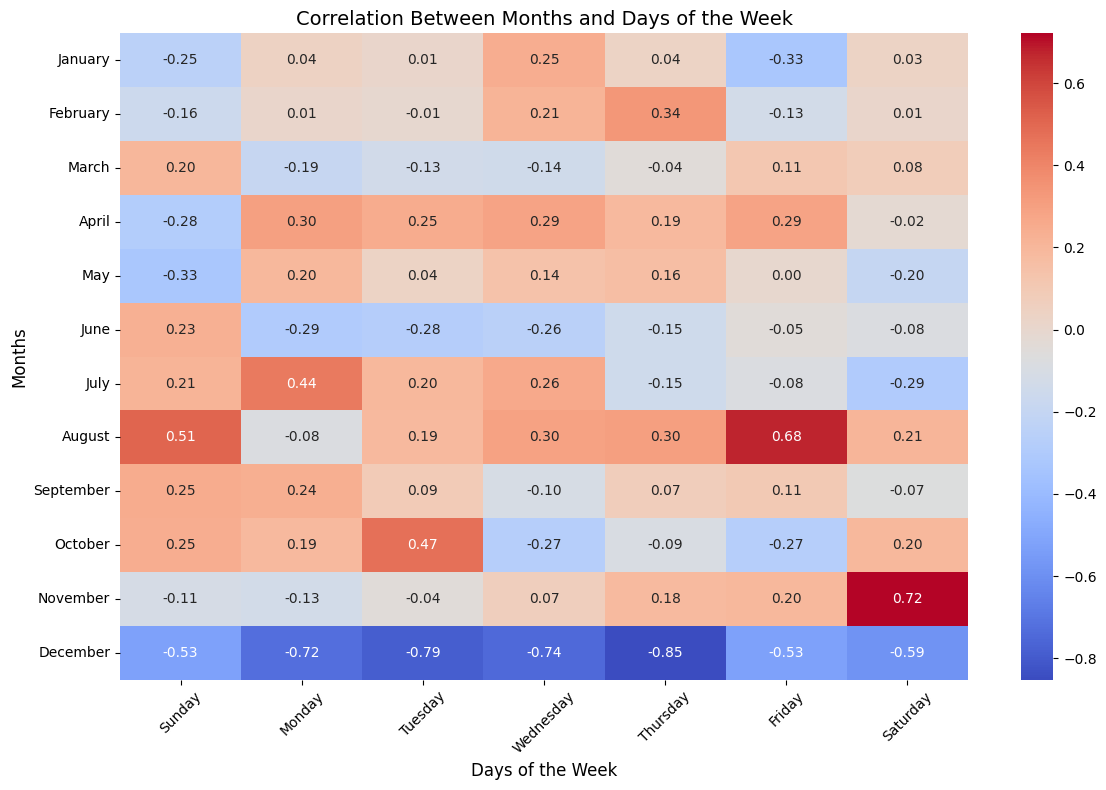

In [83]:
# Define the columns for days of the week (Sunday to Saturday)
day_columns = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix.loc[['January', 'February', 'March', 'April', 'May', 'June',
                            'July', 'August', 'September', 'October', 'November', 'December'], day_columns],  # Ensure correct slicing
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    cbar=True
)

# Add titles and labels
plt.title('Correlation Between Months and Days of the Week', fontsize=14)
plt.xlabel('Days of the Week', fontsize=12)
plt.ylabel('Months', fontsize=12)

# Rotate X-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()